### Задача 1

Импорт необходимых библиотек:

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

Определение системы:

In [2]:
def quantum_wells(t,y,J,delta_a,f_a):
    I, N = y
    dydt = [(N-1)*I,
            eta_g*(J+delta_a*np.sin(2*np.pi*f_a*t)-N*(1+I))        
    ]
    return dydt

Параметры скоростных уравнений:

In [3]:
J_thr=1 # пороговое значение параметра накачки
J=np.array([4*J_thr, 0.75*4*J_thr]) # массив параметров накачки
tau_p=20*10**(-12) # время жизни фотона в резонаторе
tau_c=1*10**(-9) # время релаксации носителей заряда в активной среде
eta_g=tau_p/tau_c

В первой лабораторной работе значение частоты определено как $f_{ro}=1.923\text{ ГГц}$. Для перехода к нормированным единицам домножим на время жизни фотона в резонаторе:

In [4]:
f_RO=1.923*10**9 # частота релаксационных колебаний в Гц
f_norm=f_RO*tau_p # нормированная частота релаксационных колебаний

Таким образом определим параметры модуляции:

In [5]:
amp_array=0.1*J # массив амплитуд модуляции параметра накачки
f_array=np.arange(0.05*f_norm,1.25*f_norm, (1.25*f_norm-0.05*f_norm)/20) # массив частот модуляции параметра накачки

Получен массив из 20 значений для дальнейшего расчета. Для определения временного промежутка найдем величину $\frac{20}{f_A}$ (подобрана, так как $\frac{10}{f_A}$ демонстрирует некорректную зависимость):

In [6]:
t_range=20/f_norm # координата временного вектора

В соответствии с первой лабораторной и рассчитанной величиной вводим начальные значения для двух параметров накачки и вектор времени:

In [7]:
y01, y02=(J[0]-1,1), (J[1]-1,1)
t=np.linspace(0,int(t_range),int(t_range)*10)

Интегрирование системы с определением минимальных и максимальных значений интенсивности в двух случаях:

In [8]:
I_min1, I_max1=np.empty(20), np.empty(20)
I_min2, I_max2=np.empty(20), np.empty(20)
for i in range(len(f_array)):
    solution_ivp1=solve_ivp(quantum_wells,t_span=[0,max(t)], t_eval=t, y0=y01, args=(J[0],amp_array[0],f_array[i]), rtol=1e-8)
    solution_ivp2=solve_ivp(quantum_wells,t_span=[0,max(t)], t_eval=t, y0=y02, args=(J[1],amp_array[1],f_array[i]), rtol=1e-8)
    I_min1[i], I_max1[i]=min(solution_ivp1.y[0]), max(solution_ivp1.y[0])
    I_min2[i], I_max2[i]=min(solution_ivp2.y[0]), max(solution_ivp2.y[0])

Переход к частотам в ГГц для построения графика:

In [9]:
f_axis=f_array/(tau_p*10**9)

График:

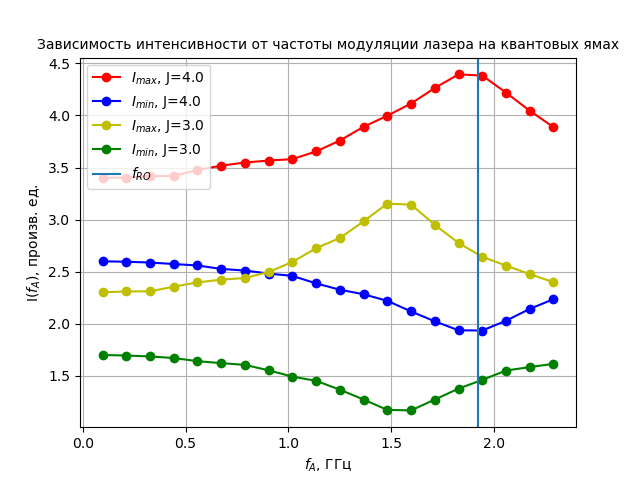

In [10]:
%matplotlib widget
plt.figure(1)
plt.rcParams["axes.titlesize"]=10
plt.title('Зависимость интенсивности от частоты модуляции лазера на квантовых ямах')
plt.xlabel('$f_A$, ГГц')
plt.ylabel('I($f_A$), произв. ед.')
plt.plot(f_axis, I_max1, 'ro-', label='$I_{max}$, J='+str(J[0]))
plt.plot(f_axis, I_min1, 'bo-', label='$I_{min}$, J='+str(J[0]))
plt.plot(f_axis, I_max2, 'yo-', label='$I_{max}$, J='+str(J[1]))
plt.plot(f_axis, I_min2, 'go-', label='$I_{min}$, J='+str(J[1]))
plt.axvline(f_RO*10**(-9), label='$f_{RO}$')
plt.legend(loc='best')
plt.grid()
plt.savefig('graph1.png',dpi=600)
plt.show()